In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyright')

In [7]:
df = web.DataReader("AAPL", data_source="yahoo", start= "2012-01-01", end= "2019-12-17")
#https://sodocumentation.net/pandas/topic/1912/pandas-datareader

Text(0, 0.5, 'USD')

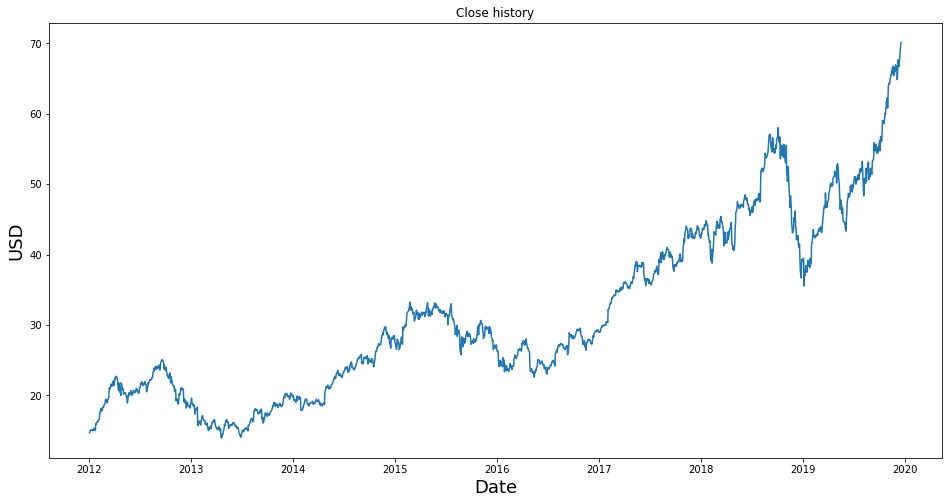

In [8]:
plt.figure(figsize=(16,8))
plt.title("Close history")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize =18)
plt.ylabel("USD", fontsize =18)

In [9]:
data = df.filter(["Close"])   #df with only close column
dataset = data.values  # convert df to numpy
training_data_len = math.ceil(len(dataset)*.8) # get num rows


training_data_len

1603

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
scaled_data= scaler.fit_transform(dataset)


scaled_data.shape

(2003, 1)

In [25]:
train_data = scaled_data[0:training_data_len, :]


x_train = []
y_train= []


for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [28]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [29]:
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [30]:
#lstm

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [31]:
model.compile(optimizer="adam", loss="mse")

In [32]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1543/1543 [==============================] - 155s 100ms/step - loss: 6.8251e-04


In [39]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test= dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

    


In [40]:
x_test = np.array(x_test)

In [42]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [44]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [46]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.9540877437591553

/Users/zibozhang/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


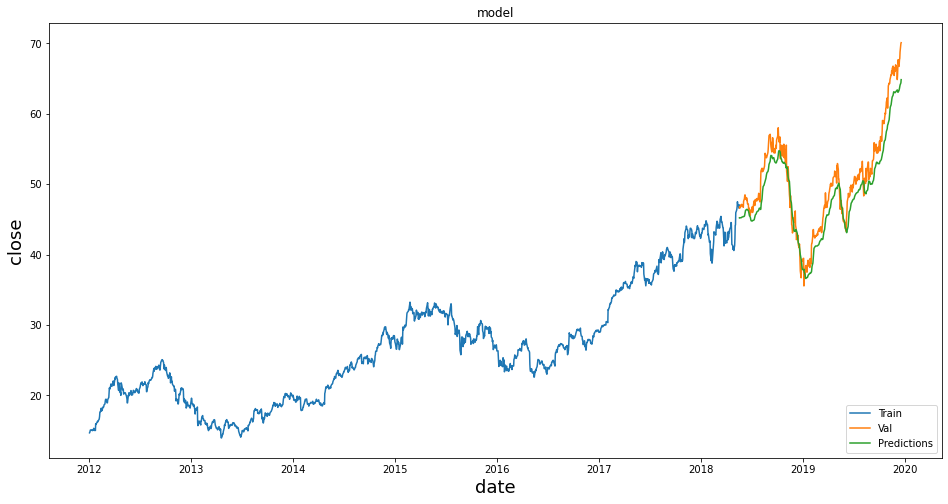

In [49]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

plt.figure(figsize=(16,8))
plt.title("model")
plt.xlabel("date", fontsize= 18)
plt.ylabel("close", fontsize = 18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc = "lower right")
plt.show()

In [50]:
valid


,Close,Predictions
Date,,
2018-05-17,46.747501,45.214989
2018-05-18,46.577499,45.248032
2018-05-21,46.907501,45.226818
2018-05-22,46.790001,45.227829
2018-05-23,47.090000,45.224739
...,...,...
2019-12-11,67.692497,63.622620
2019-12-12,67.864998,63.844284
2019-12-13,68.787498,64.074173
